In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sta
%matplotlib inline
import statsmodels.formula.api as smf
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats
from scipy.special import boxcox1p
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression 

In [3]:
# import data
data = pd.read_csv('P1train.csv')
data_dictionary= pd.read_csv('county_facts_dictionary.csv')
df=data.copy()
y1_train = df['total_votes_change_percentage']
y2_train = df['dem_change_percentage']
y1= 'total_votes_change_percentage'
y2= 'dem_change_percentage'
X_train= df.drop(['total_votes_change_percentage','dem_change_percentage'], axis=1)
X_train

,state_abbr,total_votes_2012,votes_dem_2012,votes_gop_2012,PST045214,POP010210,AGE135214,AGE295214,AGE775214,SEX255214,...,SBO415207,SBO015207,MAN450207,WTN220207,RTN130207,RTN131207,AFN120207,BPS030214,LND110210,POP060210
0,MN,7181,2772,4409,15679,15629,6.0,24.6,15.7,48.9,...,0.0,0.0,0,0,179942,11273,24494,40,1671.60,9.3
1,MI,13933,5936,7997,26121,25949,4.8,20.3,21.5,50.6,...,0.0,28.1,698616,8387,221210,8437,60229,67,416.34,62.3
2,TX,5483,1225,4258,19936,20202,4.8,17.8,14.4,37.1,...,0.0,17.6,0,378967,163334,8527,4601,1,928.55,21.8
3,NE,10004,3279,6725,20919,20780,6.2,24.9,17.4,49.4,...,0.0,14.7,0,147778,148986,7398,9218,56,750.23,27.7
4,IN,39139,22885,16254,143339,137974,4.5,16.1,11.4,50.2,...,1.5,25.2,1799286,683154,1530793,11968,287796,521,394.51,349.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,AL,6374,2048,4326,13977,13906,6.1,22.7,18.0,51.1,...,0.0,30.2,270809,131874,75456,5491,5640,2,608.84,22.8
2496,OH,9693,3911,5782,23331,23770,5.4,21.7,18.0,50.9,...,0.0,0.0,0,11415,124229,5424,15334,9,430.10,55.3
2497,KS,3837,951,2886,9385,9533,6.6,22.6,21.1,50.8,...,0.0,39.6,0,91801,109669,11776,13731,1,715.34,13.3
2498,FL,75926,17757,58169,163422,151372,5.7,22.6,14.5,48.9,...,2.6,31.5,74894,148932,1107974,7499,135111,1127,1011.61,149.6


In [ ]:
ss = StandardScaler()
X_scaled = ss.fit_transform(X)
X_scaled
X_scaled = pd.DataFrame(X_scaled, columns = X.columns)
X_scaled
# X_test_scaled = ss.transform(X_test)

# Remove Collinearity

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:111: RuntimeWarning: invalid value encountered in true_divide
  msw = sswn / float(dfwn)


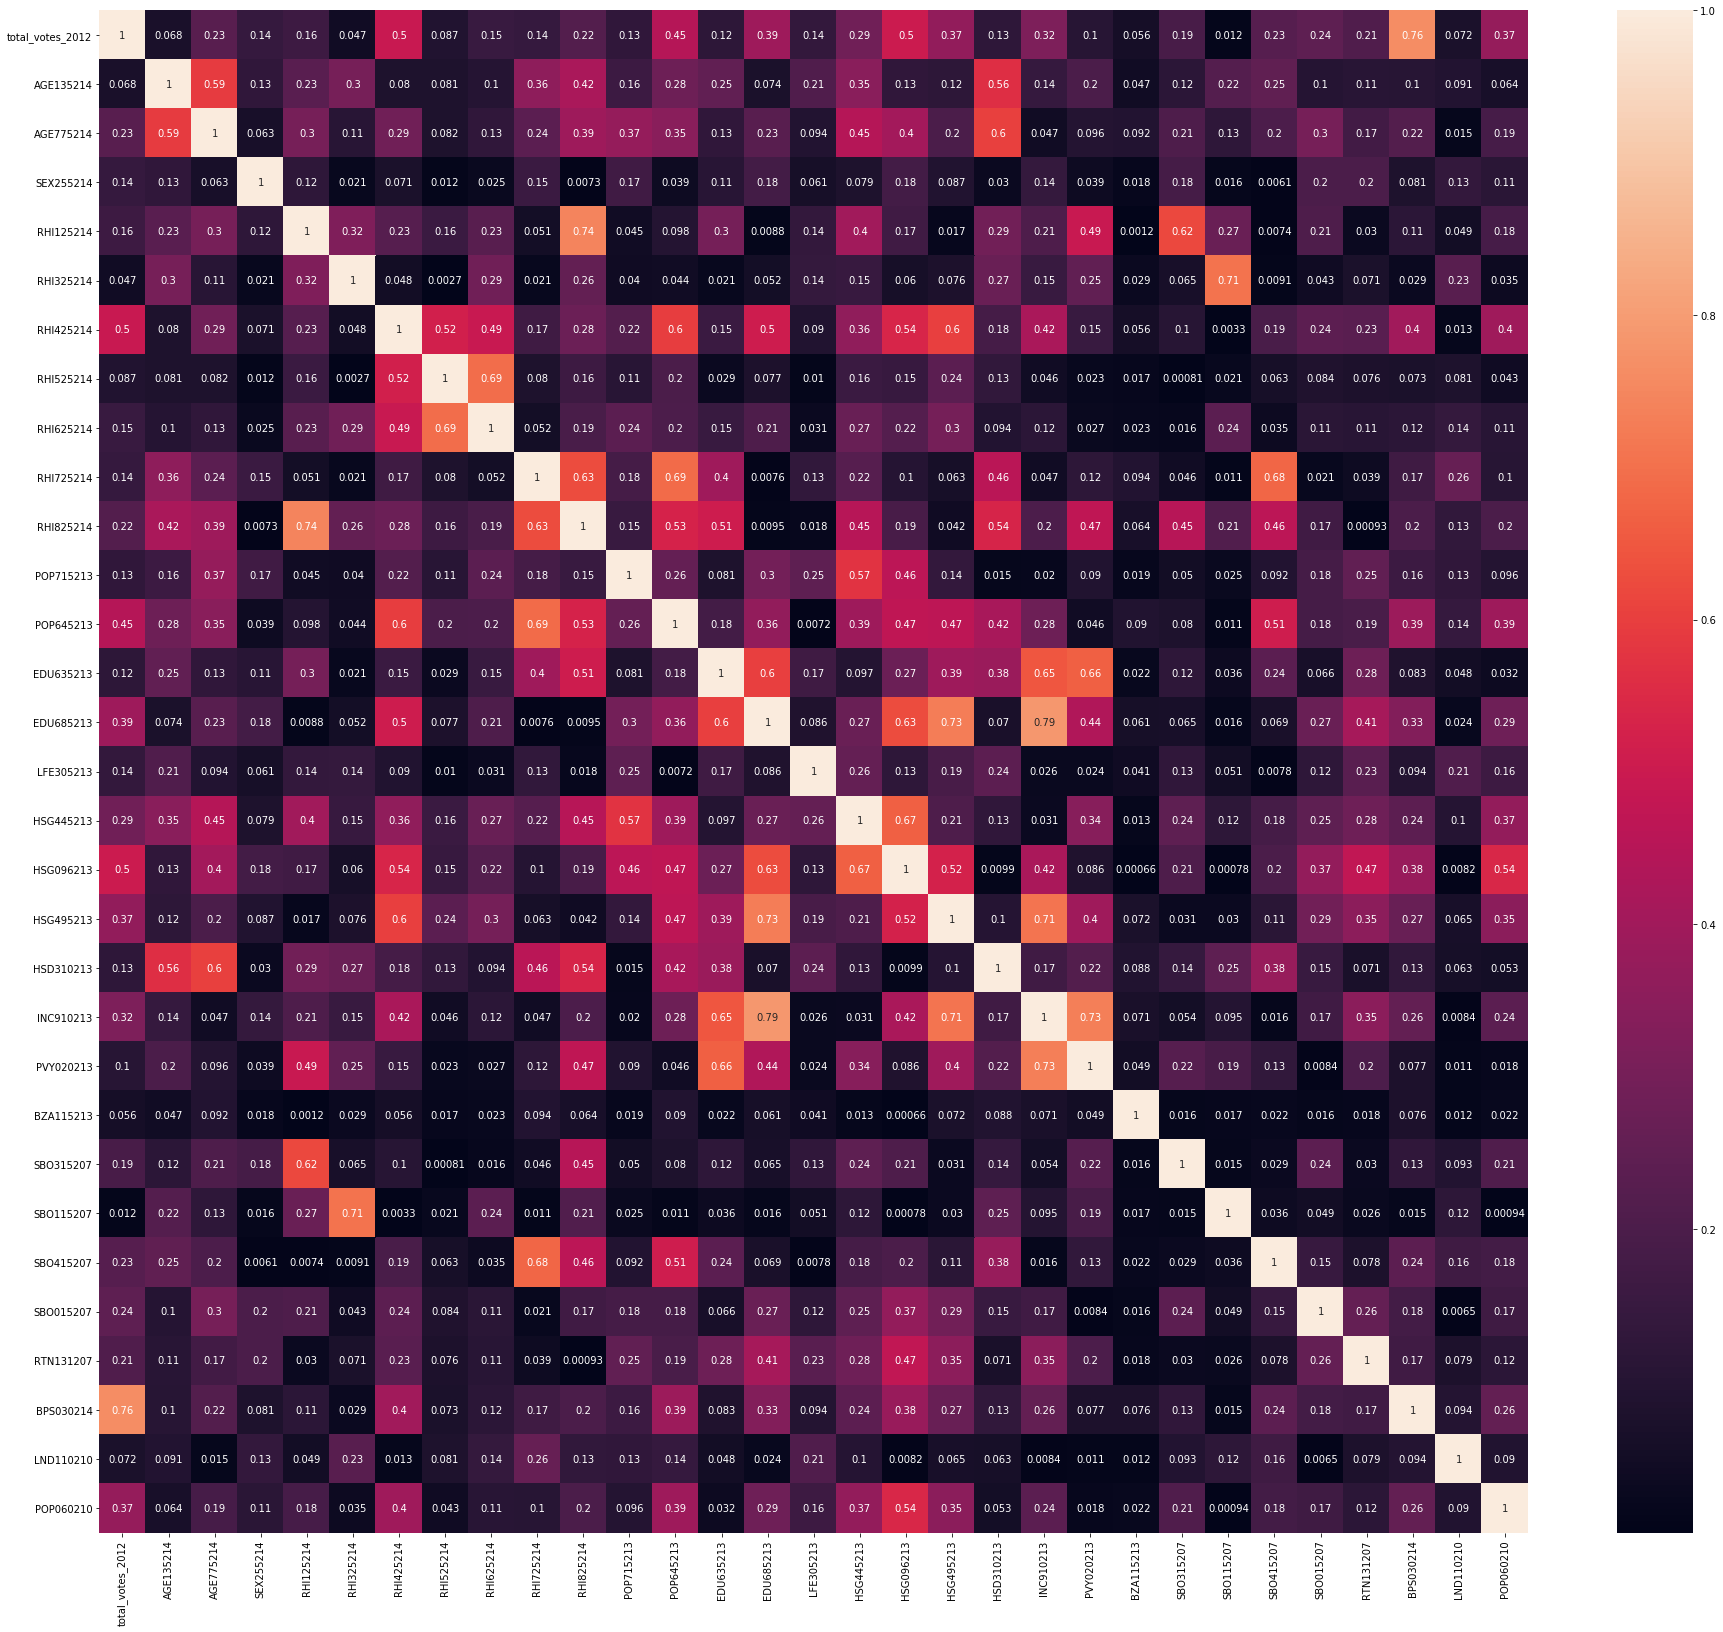

In [4]:
from collinearity import SelectNonCollinear

def remove_Collinear(X_train, TH = 0.8):
    plt.figure(figsize = (32,28))
    X_corr=X_train.iloc[:,1:].copy()
    features = X_corr.columns
    selector = SelectNonCollinear(TH)
    selector.fit(X_corr.values,y2_train)
    mask = selector.get_support()
    df2 = pd.DataFrame(X_corr.values[:,mask],columns = np.array(features)[mask])
    return df2

# df_remained1= remove_Collinear(X_train,0.7)
# sns.heatmap(df_remained1.corr().abs(),annot=True)
df2= remove_Collinear(X_train)
sns.heatmap(df2.corr().abs(),annot=True)

In [7]:
# Use VIF to remove Collinearity and rank the remianing predictor by their VIF score 
def vif_scores(df):
    VIF_Scores = pd.DataFrame()
    VIF_Scores["Independent Features"] = df.columns
    VIF_Scores["VIF Scores"] = [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
    return VIF_Scores

df3=df2.copy()
drop_list=['RHI825214','SEX255214','HSG445213','POP715213','HSD310213','AGE775214', 'INC910213', 'EDU635213', 'LFE305213','PVY020213', 'AGE135214']
df3=df3.drop(drop_list , axis=1)
df3.columns.to_list()
vif_df = vif_scores(df3).sort_values(by='VIF Scores',ignore_index = True, ascending=False)
vif_df['VIF Scores'] = vif_df['VIF Scores'].astype(np.float16)
# vif_df=vif_df.merge(data_dictionary, how ='left', left_on='Independent Features', right_on='column_name',)
vif_df

,Independent Features,VIF Scores
0,EDU685213,17.671875
1,HSG495213,10.906250
2,RHI125214,10.007812
3,HSG096213,8.226562
4,POP645213,7.523438
5,RTN131207,6.890625
6,RHI625214,6.746094
7,RHI725214,5.500000
8,RHI425214,4.347656
9,SBO015207,3.646484


In [6]:
# Generate the intreaction terms 
candidate =['state_abbr'] + df3.columns.to_list()
cand_2Inter = []
for p1 in candidate:
    for p2 in candidate:
        if p1 == p2:
            cand_2Inter.append(p1);
        else:
            cand_2Inter.append(p1+':'+p2);
                
print(cand_2Inter)
print(len(cand_2Inter))

['state_abbr', 'state_abbr:total_votes_2012', 'state_abbr:RHI125214', 'state_abbr:RHI325214', 'state_abbr:RHI425214', 'state_abbr:RHI525214', 'state_abbr:RHI625214', 'state_abbr:RHI725214', 'state_abbr:POP645213', 'state_abbr:EDU685213', 'state_abbr:HSG096213', 'state_abbr:HSG495213', 'state_abbr:BZA115213', 'state_abbr:SBO315207', 'state_abbr:SBO115207', 'state_abbr:SBO415207', 'state_abbr:SBO015207', 'state_abbr:RTN131207', 'state_abbr:BPS030214', 'state_abbr:LND110210', 'state_abbr:POP060210', 'total_votes_2012:state_abbr', 'total_votes_2012', 'total_votes_2012:RHI125214', 'total_votes_2012:RHI325214', 'total_votes_2012:RHI425214', 'total_votes_2012:RHI525214', 'total_votes_2012:RHI625214', 'total_votes_2012:RHI725214', 'total_votes_2012:POP645213', 'total_votes_2012:EDU685213', 'total_votes_2012:HSG096213', 'total_votes_2012:HSG495213', 'total_votes_2012:BZA115213', 'total_votes_2012:SBO315207', 'total_votes_2012:SBO115207', 'total_votes_2012:SBO415207', 'total_votes_2012:SBO015207

In [8]:
# load the functions to be used
# this file is also in the submitted zip folder, please load 
%run "util_formula.py"

<Figure size 432x288 with 0 Axes>

# Model Building for Y1

In [ ]:
# forward selection for the model 
fwmodel_interactions = forward(y1, cand_2Inter, df, 'AIC')
fwmodel_interactions.summary()

In [61]:
# forward selection for the model 
fwmodel_interactions = forward(y1, cand_2Inter, df, 'AIC')
fwmodel_interactions.summary()

['state_abbr:RHI125214']
['state_abbr:RHI125214', 'state_abbr:HSG495213']
['state_abbr:RHI125214', 'state_abbr:HSG495213', 'state_abbr:RHI425214']
['state_abbr:RHI125214', 'state_abbr:HSG495213', 'state_abbr:RHI425214', 'EDU685213:HSG495213']
['state_abbr:RHI125214', 'state_abbr:HSG495213', 'state_abbr:RHI425214', 'EDU685213:HSG495213', 'POP645213:SBO015207']
['state_abbr:RHI125214', 'state_abbr:HSG495213', 'state_abbr:RHI425214', 'EDU685213:HSG495213', 'POP645213:SBO015207', 'RHI425214:BZA115213']
['state_abbr:RHI125214', 'state_abbr:HSG495213', 'state_abbr:RHI425214', 'EDU685213:HSG495213', 'POP645213:SBO015207', 'RHI425214:BZA115213', 'RHI725214:SBO015207']
['state_abbr:RHI125214', 'state_abbr:HSG495213', 'state_abbr:RHI425214', 'EDU685213:HSG495213', 'POP645213:SBO015207', 'RHI425214:BZA115213', 'RHI725214:SBO015207', 'EDU685213:HSG096213']
['state_abbr:RHI125214', 'state_abbr:HSG495213', 'state_abbr:RHI425214', 'EDU685213:HSG495213', 'POP645213:SBO015207', 'RHI425214:BZA115213', '

['state_abbr:RHI125214', 'state_abbr:HSG495213', 'state_abbr:RHI425214', 'EDU685213:HSG495213', 'POP645213:SBO015207', 'RHI425214:BZA115213', 'RHI725214:SBO015207', 'EDU685213:HSG096213', 'HSG096213:SBO415207', 'SBO315207:SBO415207', 'RHI425214:SBO415207', 'SBO015207:LND110210', 'RHI725214:SBO415207', 'RHI325214:BPS030214', 'SBO115207:BPS030214', 'POP645213:SBO315207', 'RHI425214:SBO315207', 'BZA115213:POP060210', 'POP645213:RTN131207', 'RHI325214:RHI625214', 'RHI625214:RHI725214', 'RHI725214:HSG495213', 'RHI625214:SBO415207', 'total_votes_2012:RTN131207', 'RHI425214:LND110210', 'RHI125214:BPS030214', 'POP645213:BPS030214']
['state_abbr:RHI125214', 'state_abbr:HSG495213', 'state_abbr:RHI425214', 'EDU685213:HSG495213', 'POP645213:SBO015207', 'RHI425214:BZA115213', 'RHI725214:SBO015207', 'EDU685213:HSG096213', 'HSG096213:SBO415207', 'SBO315207:SBO415207', 'RHI425214:SBO415207', 'SBO015207:LND110210', 'RHI725214:SBO415207', 'RHI325214:BPS030214', 'SBO115207:BPS030214', 'POP645213:SBO31520

['state_abbr:RHI125214', 'state_abbr:HSG495213', 'state_abbr:RHI425214', 'EDU685213:HSG495213', 'POP645213:SBO015207', 'RHI425214:BZA115213', 'RHI725214:SBO015207', 'EDU685213:HSG096213', 'HSG096213:SBO415207', 'SBO315207:SBO415207', 'RHI425214:SBO415207', 'SBO015207:LND110210', 'RHI725214:SBO415207', 'RHI325214:BPS030214', 'SBO115207:BPS030214', 'POP645213:SBO315207', 'RHI425214:SBO315207', 'BZA115213:POP060210', 'POP645213:RTN131207', 'RHI325214:RHI625214', 'RHI625214:RHI725214', 'RHI725214:HSG495213', 'RHI625214:SBO415207', 'total_votes_2012:RTN131207', 'RHI425214:LND110210', 'RHI125214:BPS030214', 'POP645213:BPS030214', 'total_votes_2012:POP060210', 'RHI125214:RHI625214', 'HSG495213:LND110210', 'LND110210', 'total_votes_2012:RHI325214', 'total_votes_2012:SBO115207', 'RHI625214:LND110210', 'RHI425214:POP645213', 'LND110210:POP060210', 'total_votes_2012:RHI125214', 'total_votes_2012:LND110210']
['state_abbr:RHI125214', 'state_abbr:HSG495213', 'state_abbr:RHI425214', 'EDU685213:HSG495

['state_abbr:RHI125214', 'state_abbr:HSG495213', 'state_abbr:RHI425214', 'EDU685213:HSG495213', 'POP645213:SBO015207', 'RHI425214:BZA115213', 'RHI725214:SBO015207', 'EDU685213:HSG096213', 'HSG096213:SBO415207', 'SBO315207:SBO415207', 'RHI425214:SBO415207', 'SBO015207:LND110210', 'RHI725214:SBO415207', 'RHI325214:BPS030214', 'SBO115207:BPS030214', 'POP645213:SBO315207', 'RHI425214:SBO315207', 'BZA115213:POP060210', 'POP645213:RTN131207', 'RHI325214:RHI625214', 'RHI625214:RHI725214', 'RHI725214:HSG495213', 'RHI625214:SBO415207', 'total_votes_2012:RTN131207', 'RHI425214:LND110210', 'RHI125214:BPS030214', 'POP645213:BPS030214', 'total_votes_2012:POP060210', 'RHI125214:RHI625214', 'HSG495213:LND110210', 'LND110210', 'total_votes_2012:RHI325214', 'total_votes_2012:SBO115207', 'RHI625214:LND110210', 'RHI425214:POP645213', 'LND110210:POP060210', 'total_votes_2012:RHI125214', 'total_votes_2012:LND110210', 'total_votes_2012:RHI725214', 'total_votes_2012', 'POP645213:SBO415207', 'BZA115213:SBO415

['state_abbr:RHI125214', 'state_abbr:HSG495213', 'state_abbr:RHI425214', 'EDU685213:HSG495213', 'POP645213:SBO015207', 'RHI425214:BZA115213', 'RHI725214:SBO015207', 'EDU685213:HSG096213', 'HSG096213:SBO415207', 'SBO315207:SBO415207', 'RHI425214:SBO415207', 'SBO015207:LND110210', 'RHI725214:SBO415207', 'RHI325214:BPS030214', 'SBO115207:BPS030214', 'POP645213:SBO315207', 'RHI425214:SBO315207', 'BZA115213:POP060210', 'POP645213:RTN131207', 'RHI325214:RHI625214', 'RHI625214:RHI725214', 'RHI725214:HSG495213', 'RHI625214:SBO415207', 'total_votes_2012:RTN131207', 'RHI425214:LND110210', 'RHI125214:BPS030214', 'POP645213:BPS030214', 'total_votes_2012:POP060210', 'RHI125214:RHI625214', 'HSG495213:LND110210', 'LND110210', 'total_votes_2012:RHI325214', 'total_votes_2012:SBO115207', 'RHI625214:LND110210', 'RHI425214:POP645213', 'LND110210:POP060210', 'total_votes_2012:RHI125214', 'total_votes_2012:LND110210', 'total_votes_2012:RHI725214', 'total_votes_2012', 'POP645213:SBO415207', 'BZA115213:SBO415

['state_abbr:RHI125214', 'state_abbr:HSG495213', 'state_abbr:RHI425214', 'EDU685213:HSG495213', 'POP645213:SBO015207', 'RHI425214:BZA115213', 'RHI725214:SBO015207', 'EDU685213:HSG096213', 'HSG096213:SBO415207', 'SBO315207:SBO415207', 'RHI425214:SBO415207', 'SBO015207:LND110210', 'RHI725214:SBO415207', 'RHI325214:BPS030214', 'SBO115207:BPS030214', 'POP645213:SBO315207', 'RHI425214:SBO315207', 'BZA115213:POP060210', 'POP645213:RTN131207', 'RHI325214:RHI625214', 'RHI625214:RHI725214', 'RHI725214:HSG495213', 'RHI625214:SBO415207', 'total_votes_2012:RTN131207', 'RHI425214:LND110210', 'RHI125214:BPS030214', 'POP645213:BPS030214', 'total_votes_2012:POP060210', 'RHI125214:RHI625214', 'HSG495213:LND110210', 'LND110210', 'total_votes_2012:RHI325214', 'total_votes_2012:SBO115207', 'RHI625214:LND110210', 'RHI425214:POP645213', 'LND110210:POP060210', 'total_votes_2012:RHI125214', 'total_votes_2012:LND110210', 'total_votes_2012:RHI725214', 'total_votes_2012', 'POP645213:SBO415207', 'BZA115213:SBO415

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\tools.py:396: RuntimeWarning: overflow encountered in double_scalars
  s[i] = 1./s[i]
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\tools.py:400: RuntimeWarning: invalid value encountered in multiply
  np.transpose(u)))


['state_abbr:RHI125214', 'state_abbr:HSG495213', 'state_abbr:RHI425214', 'EDU685213:HSG495213', 'POP645213:SBO015207', 'RHI425214:BZA115213', 'RHI725214:SBO015207', 'EDU685213:HSG096213', 'HSG096213:SBO415207', 'SBO315207:SBO415207', 'RHI425214:SBO415207', 'SBO015207:LND110210', 'RHI725214:SBO415207', 'RHI325214:BPS030214', 'SBO115207:BPS030214', 'POP645213:SBO315207', 'RHI425214:SBO315207', 'BZA115213:POP060210', 'POP645213:RTN131207', 'RHI325214:RHI625214', 'RHI625214:RHI725214', 'RHI725214:HSG495213', 'RHI625214:SBO415207', 'total_votes_2012:RTN131207', 'RHI425214:LND110210', 'RHI125214:BPS030214', 'POP645213:BPS030214', 'total_votes_2012:POP060210', 'RHI125214:RHI625214', 'HSG495213:LND110210', 'LND110210', 'total_votes_2012:RHI325214', 'total_votes_2012:SBO115207', 'RHI625214:LND110210', 'RHI425214:POP645213', 'LND110210:POP060210', 'total_votes_2012:RHI125214', 'total_votes_2012:LND110210', 'total_votes_2012:RHI725214', 'total_votes_2012', 'POP645213:SBO415207', 'BZA115213:SBO415

['state_abbr:RHI125214', 'state_abbr:HSG495213', 'state_abbr:RHI425214', 'EDU685213:HSG495213', 'POP645213:SBO015207', 'RHI425214:BZA115213', 'RHI725214:SBO015207', 'EDU685213:HSG096213', 'HSG096213:SBO415207', 'SBO315207:SBO415207', 'RHI425214:SBO415207', 'SBO015207:LND110210', 'RHI725214:SBO415207', 'RHI325214:BPS030214', 'SBO115207:BPS030214', 'POP645213:SBO315207', 'RHI425214:SBO315207', 'BZA115213:POP060210', 'POP645213:RTN131207', 'RHI325214:RHI625214', 'RHI625214:RHI725214', 'RHI725214:HSG495213', 'RHI625214:SBO415207', 'total_votes_2012:RTN131207', 'RHI425214:LND110210', 'RHI125214:BPS030214', 'POP645213:BPS030214', 'total_votes_2012:POP060210', 'RHI125214:RHI625214', 'HSG495213:LND110210', 'LND110210', 'total_votes_2012:RHI325214', 'total_votes_2012:SBO115207', 'RHI625214:LND110210', 'RHI425214:POP645213', 'LND110210:POP060210', 'total_votes_2012:RHI125214', 'total_votes_2012:LND110210', 'total_votes_2012:RHI725214', 'total_votes_2012', 'POP645213:SBO415207', 'BZA115213:SBO415

['state_abbr:RHI125214', 'state_abbr:HSG495213', 'state_abbr:RHI425214', 'EDU685213:HSG495213', 'POP645213:SBO015207', 'RHI425214:BZA115213', 'RHI725214:SBO015207', 'EDU685213:HSG096213', 'HSG096213:SBO415207', 'SBO315207:SBO415207', 'RHI425214:SBO415207', 'SBO015207:LND110210', 'RHI725214:SBO415207', 'RHI325214:BPS030214', 'SBO115207:BPS030214', 'POP645213:SBO315207', 'RHI425214:SBO315207', 'BZA115213:POP060210', 'POP645213:RTN131207', 'RHI325214:RHI625214', 'RHI625214:RHI725214', 'RHI725214:HSG495213', 'RHI625214:SBO415207', 'total_votes_2012:RTN131207', 'RHI425214:LND110210', 'RHI125214:BPS030214', 'POP645213:BPS030214', 'total_votes_2012:POP060210', 'RHI125214:RHI625214', 'HSG495213:LND110210', 'LND110210', 'total_votes_2012:RHI325214', 'total_votes_2012:SBO115207', 'RHI625214:LND110210', 'RHI425214:POP645213', 'LND110210:POP060210', 'total_votes_2012:RHI125214', 'total_votes_2012:LND110210', 'total_votes_2012:RHI725214', 'total_votes_2012', 'POP645213:SBO415207', 'BZA115213:SBO415

['state_abbr:RHI125214', 'state_abbr:HSG495213', 'state_abbr:RHI425214', 'EDU685213:HSG495213', 'POP645213:SBO015207', 'RHI425214:BZA115213', 'RHI725214:SBO015207', 'EDU685213:HSG096213', 'HSG096213:SBO415207', 'SBO315207:SBO415207', 'RHI425214:SBO415207', 'SBO015207:LND110210', 'RHI725214:SBO415207', 'RHI325214:BPS030214', 'SBO115207:BPS030214', 'POP645213:SBO315207', 'RHI425214:SBO315207', 'BZA115213:POP060210', 'POP645213:RTN131207', 'RHI325214:RHI625214', 'RHI625214:RHI725214', 'RHI725214:HSG495213', 'RHI625214:SBO415207', 'total_votes_2012:RTN131207', 'RHI425214:LND110210', 'RHI125214:BPS030214', 'POP645213:BPS030214', 'total_votes_2012:POP060210', 'RHI125214:RHI625214', 'HSG495213:LND110210', 'LND110210', 'total_votes_2012:RHI325214', 'total_votes_2012:SBO115207', 'RHI625214:LND110210', 'RHI425214:POP645213', 'LND110210:POP060210', 'total_votes_2012:RHI125214', 'total_votes_2012:LND110210', 'total_votes_2012:RHI725214', 'total_votes_2012', 'POP645213:SBO415207', 'BZA115213:SBO415

['state_abbr:RHI125214', 'state_abbr:HSG495213', 'state_abbr:RHI425214', 'EDU685213:HSG495213', 'POP645213:SBO015207', 'RHI425214:BZA115213', 'RHI725214:SBO015207', 'EDU685213:HSG096213', 'HSG096213:SBO415207', 'SBO315207:SBO415207', 'RHI425214:SBO415207', 'SBO015207:LND110210', 'RHI725214:SBO415207', 'RHI325214:BPS030214', 'SBO115207:BPS030214', 'POP645213:SBO315207', 'RHI425214:SBO315207', 'BZA115213:POP060210', 'POP645213:RTN131207', 'RHI325214:RHI625214', 'RHI625214:RHI725214', 'RHI725214:HSG495213', 'RHI625214:SBO415207', 'total_votes_2012:RTN131207', 'RHI425214:LND110210', 'RHI125214:BPS030214', 'POP645213:BPS030214', 'total_votes_2012:POP060210', 'RHI125214:RHI625214', 'HSG495213:LND110210', 'LND110210', 'total_votes_2012:RHI325214', 'total_votes_2012:SBO115207', 'RHI625214:LND110210', 'RHI425214:POP645213', 'LND110210:POP060210', 'total_votes_2012:RHI125214', 'total_votes_2012:LND110210', 'total_votes_2012:RHI725214', 'total_votes_2012', 'POP645213:SBO415207', 'BZA115213:SBO415

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     total_votes_change_percentage   R-squared:                       0.543
Model:                                       OLS   Adj. R-squared:                  0.489
Method:                            Least Squares   F-statistic:                     10.01
Date:                           Tue, 21 Sep 2021   Prob (F-statistic):          3.07e-234
Time:                                   19:03:51   Log-Likelihood:                 3759.4
No. Observations:                           2500   AIC:                            -6987.
Df Residuals:                               2234   BIC:                            -5438.
Df Model:                                    265                                         
Covariance Type:                       nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     -0.2703      0.027    -10.064      0.000      -0.323      -0.218
state_abbr[AL]:RHI125214       0.2573      0.050      5.171      0.000       0.160       0.355
state_abbr[AR]:RHI125214       0.2138      0.047      4.585      0.000       0.122       0.305
state_abbr[AZ]:RHI125214       0.4138      0.115      3.585      0.000       0.187       0.640
state_abbr[CA]:RHI125214       0.4036      0.058      6.970      0.000       0.290       0.517
state_abbr[CO]:RHI125214       0.2935      0.044      6.720      0.000       0.208       0.379
state_abbr[CT]:RHI125214       0.3856      0.489      0.788      0.430      -0.573       1.345
state_abbr[DE]:RHI125214       0.7048      1.335      0.528      0.598      -1.913       3.323
state_abbr[FL]:RHI125214       0.3354      0.044      7.708      0.000       0.250       0.421
state_abbr[GA]:RHI125214       0.2940      0.043      6.839      0.000       0.210       0.378
state_abbr[HI]:RHI125214     -20.4151      8.412     -2.427      0.015     -36.912      -3.918
state_abbr[IA]:RHI125214       0.1808      0.039      4.614      0.000       0.104       0.258
state_abbr[ID]:RHI125214       0.0741      0.053      1.397      0.163      -0.030       0.178
state_abbr[IL]:RHI125214       0.2626      0.036      7.236      0.000       0.191       0.334
state_abbr[IN]:RHI125214       0.2416      0.042      5.720      0.000       0.159       0.324
state_abbr[KS]:RHI125214       0.1904      0.037      5.113      0.000       0.117       0.263
state_abbr[KY]:RHI125214       0.2953      0.035      8.431      0.000       0.227       0.364
state_abbr[LA]:RHI125214       0.2764      0.050      5.509      0.000       0.178       0.375
state_abbr[MA]:RHI125214       0.3196      0.065      4.887      0.000       0.191       0.448
state_abbr[MD]:RHI125214       0.2934      0.075      3.937      0.000       0.147       0.440
state_abbr[ME]:RHI125214       0.0960      0.101      0.949      0.343      -0.102       0.294
state_abbr[MI]:RHI125214       0.1811      0.042      4.331      0.000       0.099       0.263
state_abbr[MN]:RHI125214       0.1846      0.040      4.584      0.000       0.106       0.264
state_abbr[MO]:RHI125214       0.2584      0.038      6.720      0.000       0.183       0.334
state_abbr[MS]:RHI125214       0.2849      0.056      5.080      0.000       0.175       0.395
state_abbr[MT]:RHI125214       0.1946      0.043      4.483      0.000       0.109       0.280
state_abbr[NC]:RHI125214       0.2752      0.048      5.781      0.000       0.182       0.369
state_abbr[ND]:RHI125214       0.1468      0.042      3.508      0.000       0.065       0.229
state_abbr[NE]:RH

In [18]:
# record the important interactions and their first-order terms 
predictors_w_interaction = \
['state_abbr*RHI125214', 'state_abbr*HSG495213', 'state_abbr*RHI425214', 'EDU685213*HSG495213', 'POP645213*SBO015207', 'RHI425214*BZA115213', 'RHI725214*SBO015207', 'EDU685213*HSG096213', 'HSG096213*SBO415207', 'SBO315207*SBO415207', 'RHI425214*SBO415207', 'SBO015207*LND110210', 'RHI725214*SBO415207', 'RHI325214*BPS030214', 'SBO115207*BPS030214', 'POP645213*SBO315207', 'RHI425214*SBO315207', 'BZA115213*POP060210', 'POP645213*RTN131207', 'RHI325214*RHI625214', 'RHI625214*RHI725214', 'RHI725214*HSG495213', 'RHI625214*SBO415207', 'total_votes_2012*RTN131207', 'RHI425214*LND110210', 'RHI125214*BPS030214', 'POP645213*BPS030214', 'total_votes_2012*POP060210', 'RHI125214*RHI625214', 'HSG495213*LND110210', 'LND110210', 'total_votes_2012*RHI325214', 'total_votes_2012*SBO115207', 'RHI625214*LND110210', 'RHI425214*POP645213', 'LND110210*POP060210', 'total_votes_2012*RHI125214', 'total_votes_2012*LND110210', 'total_votes_2012*RHI725214', 'total_votes_2012', 'POP645213*SBO415207', 'BZA115213*SBO415207', 'RHI525214*SBO315207', 'POP645213*LND110210', 'SBO415207*BPS030214', 'total_votes_2012*EDU685213', 'HSG096213*LND110210', 'RHI525214*BZA115213', 'BZA115213*SBO015207', 'BPS030214', 'EDU685213*BPS030214', 'RHI725214*BPS030214', 'RHI125214*EDU685213', 'SBO415207*POP060210', 'SBO115207*POP060210', 'BPS030214*POP060210', 'RHI325214*SBO315207', 'RHI125214*HSG096213', 'RHI125214*RHI425214', 'EDU685213*SBO315207', 'SBO315207*RTN131207', 'RHI125214*BZA115213', 'RHI725214*BZA115213', 'total_votes_2012*HSG495213', 'state_abbr*RHI725214', 'RHI425214*RHI525214', 'RHI525214*SBO115207', 'RHI725214*EDU685213', 'total_votes_2012*RHI425214', 'HSG495213*RTN131207', 'EDU685213*SBO015207', 'SBO015207', 'EDU685213', 'RHI525214*LND110210', 'POP645213*HSG495213', 'EDU685213*RTN131207', 'RHI325214*HSG495213', 'RHI125214*RHI325214', 'RHI725214', 'POP645213', 'RHI425214*SBO115207', 'BZA115213', 'BZA115213*RTN131207', 'POP645213*POP060210', 'SBO315207*POP060210', 'SBO015207*POP060210', 'total_votes_2012*SBO415207', 'RHI325214*POP060210', 'SBO315207*SBO115207', 'RHI425214', 'HSG495213']
df1= df.drop([578,2274,785], axis=0)
# predictors_w_interaction = predictors_w_interaction + df1.columns.to_list()
len(predictors_w_interaction)

91

In [36]:
# Build the model using selected terms 
formula0 = y1 + '~ state_abbr + total_votes_2012 + RHI225214 +' + '+'.join(predictors_w_interaction)
model_interactions_0 = smf.ols(formula0, df1).fit()
model_interactions_0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     total_votes_change_percentage   R-squared:                       0.593
Model:                                       OLS   Adj. R-squared:                  0.536
Method:                            Least Squares   F-statistic:                     10.41
Date:                           Sun, 26 Sep 2021   Prob (F-statistic):          7.03e-263
Time:                                   19:11:32   Log-Likelihood:                 4007.1
No. Observations:                           2497   AIC:                            -7400.
Df Residuals:                               2190   BIC:                            -5613.
Df Model:                                    306                                         
Covariance Type:                       nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     -0.7431      1.572     -0.473      0.636      -3.825       2.339
state_abbr[T.AR]              -0.0034      0.049     -0.069      0.945      -0.100       0.093
state_abbr[T.AZ]              -0.1103      0.203     -0.544      0.587      -0.508       0.288
state_abbr[T.CA]              -0.1585      0.252     -0.629      0.529      -0.652       0.336
state_abbr[T.CO]               0.0180      0.258      0.070      0.945      -0.489       0.525
state_abbr[T.CT]               1.9074      7.921      0.241      0.810     -13.626      17.441
state_abbr[T.DE]               0.1614      0.334      0.484      0.629      -0.493       0.816
state_abbr[T.FL]              -0.0320      0.074     -0.431      0.666      -0.177       0.113
state_abbr[T.GA]              -0.0010      0.039     -0.026      0.979      -0.077       0.075
state_abbr[T.HI]               8.9340      4.573      1.954      0.051      -0.035      17.903
state_abbr[T.IA]              -0.3344      0.321     -1.041      0.298      -0.964       0.296
state_abbr[T.ID]               0.4036      0.460      0.877      0.381      -0.499       1.306
state_abbr[T.IL]               0.0378      0.098      0.387      0.699      -0.154       0.229
state_abbr[T.IN]              -0.1227      0.148     -0.827      0.408      -0.414       0.168
state_abbr[T.KS]              -0.0196      0.156     -0.125      0.900      -0.326       0.287
state_abbr[T.KY]              -0.2009      0.168     -1.193      0.233      -0.531       0.129
state_abbr[T.LA]               0.0236      0.052      0.457      0.648      -0.078       0.125
state_abbr[T.MA]               0.5178      0.465      1.115      0.265      -0.393       1.429
state_abbr[T.MD]               0.0919      0.100      0.914      0.361      -0.105       0.289
state_abbr[T.ME]               0.8393      1.572      0.534      0.593      -2.243       3.922
state_abbr[T.MI]               0.0240      0.129      0.186      0.853      -0.229       0.277
state_abbr[T.MN]              -0.0286      0.192     -0.148      0.882      -0.406       0.349
state_abbr[T.MO]               0.0199      0.099      0.201      0.841      -0.174       0.214
state_abbr[T.MS]               0.0062      0.040      0.156      0.876      -0.072       0.085
state_abbr[T.MT]              -0.1109      0.132     -0.838      0.402      -0.370       0.149
state_abbr[T.NC]               0.0477      0.044      1.088      0.277      -0.038       0.134
state_abbr[T.ND]              -0.0960      0.125     -0.766      0.444      -0.342       0.150
state_abbr[T.NE]               0.0180      0.301      0.060      0.952      -0.572       0.608
state_abbr[T.NH] 

The Adj. R-squared increase from 0.372 to 0.536 and the AIC value decrease from -6670 to -7400. 

In [30]:
# Predict the result for R1

# In test data set state DE was change to DC
X_test = pd.read_csv('P1test.csv')
total_votes_change_percentage = model_interactions_0.predict(X_test)
total_votes_change_percentage

0     -0.058242
1     -0.023769
2      0.104555
3     -0.123114
4     -0.095376
         ...   
607   -0.002272
608    0.028737
609    0.034019
610   -0.067377
611    0.044411
Length: 612, dtype: float64

# Model Building for Y2

In [76]:
fwmodel_interactions_y2 = forward(y2, cand_2Inter, df, 'AIC')
fwmodel_interactions_y2.summary()

['state_abbr:EDU685213']
['state_abbr:EDU685213', 'state_abbr:RHI125214']
['state_abbr:EDU685213', 'state_abbr:RHI125214', 'state_abbr:RHI725214']
['state_abbr:EDU685213', 'state_abbr:RHI125214', 'state_abbr:RHI725214', 'RHI125214:RHI325214']
['state_abbr:EDU685213', 'state_abbr:RHI125214', 'state_abbr:RHI725214', 'RHI125214:RHI325214', 'state_abbr:HSG495213']
['state_abbr:EDU685213', 'state_abbr:RHI125214', 'state_abbr:RHI725214', 'RHI125214:RHI325214', 'state_abbr:HSG495213', 'state_abbr:POP645213']
['state_abbr:EDU685213', 'state_abbr:RHI125214', 'state_abbr:RHI725214', 'RHI125214:RHI325214', 'state_abbr:HSG495213', 'state_abbr:POP645213', 'total_votes_2012:HSG495213']
['state_abbr:EDU685213', 'state_abbr:RHI125214', 'state_abbr:RHI725214', 'RHI125214:RHI325214', 'state_abbr:HSG495213', 'state_abbr:POP645213', 'total_votes_2012:HSG495213', 'state_abbr']
['state_abbr:EDU685213', 'state_abbr:RHI125214', 'state_abbr:RHI725214', 'RHI125214:RHI325214', 'state_abbr:HSG495213', 'state_abbr

['state_abbr:EDU685213', 'state_abbr:RHI125214', 'state_abbr:RHI725214', 'RHI125214:RHI325214', 'state_abbr:HSG495213', 'state_abbr:POP645213', 'total_votes_2012:HSG495213', 'state_abbr', 'state_abbr:RHI325214', 'state_abbr:RHI525214', 'state_abbr:POP060210', 'state_abbr:RHI625214', 'RHI125214:HSG096213', 'RHI125214:RHI425214', 'RHI425214:EDU685213', 'SBO115207:LND110210', 'SBO415207:POP060210', 'SBO015207:POP060210', 'state_abbr:LND110210', 'RHI725214:SBO415207', 'HSG096213:SBO415207', 'HSG096213:LND110210', 'HSG495213:LND110210', 'total_votes_2012:RTN131207', 'RHI625214:EDU685213', 'SBO315207:SBO115207', 'POP645213:SBO115207']
['state_abbr:EDU685213', 'state_abbr:RHI125214', 'state_abbr:RHI725214', 'RHI125214:RHI325214', 'state_abbr:HSG495213', 'state_abbr:POP645213', 'total_votes_2012:HSG495213', 'state_abbr', 'state_abbr:RHI325214', 'state_abbr:RHI525214', 'state_abbr:POP060210', 'state_abbr:RHI625214', 'RHI125214:HSG096213', 'RHI125214:RHI425214', 'RHI425214:EDU685213', 'SBO115207

['state_abbr:EDU685213', 'state_abbr:RHI125214', 'state_abbr:RHI725214', 'RHI125214:RHI325214', 'state_abbr:HSG495213', 'state_abbr:POP645213', 'total_votes_2012:HSG495213', 'state_abbr', 'state_abbr:RHI325214', 'state_abbr:RHI525214', 'state_abbr:POP060210', 'state_abbr:RHI625214', 'RHI125214:HSG096213', 'RHI125214:RHI425214', 'RHI425214:EDU685213', 'SBO115207:LND110210', 'SBO415207:POP060210', 'SBO015207:POP060210', 'state_abbr:LND110210', 'RHI725214:SBO415207', 'HSG096213:SBO415207', 'HSG096213:LND110210', 'HSG495213:LND110210', 'total_votes_2012:RTN131207', 'RHI625214:EDU685213', 'SBO315207:SBO115207', 'POP645213:SBO115207', 'RHI425214:HSG495213', 'RHI425214:RHI725214', 'RHI525214:RHI725214', 'RHI625214:RHI725214', 'HSG495213:POP060210', 'POP645213:HSG495213', 'RHI525214', 'BZA115213:SBO015207', 'POP645213:BZA115213', 'BZA115213:SBO415207', 'SBO415207']
['state_abbr:EDU685213', 'state_abbr:RHI125214', 'state_abbr:RHI725214', 'RHI125214:RHI325214', 'state_abbr:HSG495213', 'state_abb

['state_abbr:EDU685213', 'state_abbr:RHI125214', 'state_abbr:RHI725214', 'RHI125214:RHI325214', 'state_abbr:HSG495213', 'state_abbr:POP645213', 'total_votes_2012:HSG495213', 'state_abbr', 'state_abbr:RHI325214', 'state_abbr:RHI525214', 'state_abbr:POP060210', 'state_abbr:RHI625214', 'RHI125214:HSG096213', 'RHI125214:RHI425214', 'RHI425214:EDU685213', 'SBO115207:LND110210', 'SBO415207:POP060210', 'SBO015207:POP060210', 'state_abbr:LND110210', 'RHI725214:SBO415207', 'HSG096213:SBO415207', 'HSG096213:LND110210', 'HSG495213:LND110210', 'total_votes_2012:RTN131207', 'RHI625214:EDU685213', 'SBO315207:SBO115207', 'POP645213:SBO115207', 'RHI425214:HSG495213', 'RHI425214:RHI725214', 'RHI525214:RHI725214', 'RHI625214:RHI725214', 'HSG495213:POP060210', 'POP645213:HSG495213', 'RHI525214', 'BZA115213:SBO015207', 'POP645213:BZA115213', 'BZA115213:SBO415207', 'SBO415207', 'RHI725214:EDU685213', 'POP645213:HSG096213', 'RHI125214:EDU685213', 'BZA115213:LND110210', 'SBO115207:POP060210', 'RHI325214:POP0

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     dem_change_percentage   R-squared:                       0.877
Model:                               OLS   Adj. R-squared:                  0.849
Method:                    Least Squares   F-statistic:                     31.40
Date:                   Wed, 22 Sep 2021   Prob (F-statistic):               0.00
Time:                           21:43:13   Log-Likelihood:                 6445.9
No. Observations:                   2500   AIC:                        -1.196e+04
Df Residuals:                       2036   BIC:                            -9261.
Df Model:                            463                                         
Covariance Type:               nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      0.0004      0.021      0.019      0.985      -0.040       0.041
state_abbr[T.AR]              -0.0066      0.030     -0.222      0.824      -0.065       0.052
state_abbr[T.AZ]               4.0438      1.501      2.694      0.007       1.100       6.987
state_abbr[T.CA]               0.2012      0.131      1.540      0.124      -0.055       0.457
state_abbr[T.CO]              -0.1871      0.138     -1.355      0.176      -0.458       0.084
state_abbr[T.CT]              -0.0028      0.002     -1.120      0.263      -0.008       0.002
state_abbr[T.DE]               0.0010      0.001      0.789      0.430      -0.001       0.003
state_abbr[T.FL]               0.0187      0.032      0.577      0.564      -0.045       0.082
state_abbr[T.GA]              -0.0298      0.021     -1.420      0.156      -0.071       0.011
state_abbr[T.HI]              -0.0002      0.000     -1.491      0.136      -0.000    5.99e-05
state_abbr[T.IA]              -0.8479      0.243     -3.491      0.000      -1.324      -0.372
state_abbr[T.ID]               0.1966      0.519      0.379      0.705      -0.822       1.215
state_abbr[T.IL]              -0.0354      0.065     -0.549      0.583      -0.162       0.091
state_abbr[T.IN]              -0.5253      0.136     -3.866      0.000      -0.792      -0.259
state_abbr[T.KS]              -0.0746      0.112     -0.665      0.506      -0.295       0.145
state_abbr[T.KY]              -0.0549      0.084     -0.655      0.513      -0.220       0.110
state_abbr[T.LA]              -0.0116      0.025     -0.461      0.645      -0.061       0.038
state_abbr[T.MA]              -0.0405      0.453     -0.089      0.929      -0.928       0.847
state_abbr[T.MD]               0.0369      0.062      0.600      0.549      -0.084       0.158
state_abbr[T.ME]               0.7016      1.344      0.522      0.602      -1.933       3.336
state_abbr[T.MI]              -0.1635      0.089     -1.841      0.066      -0.338       0.011
state_abbr[T.MN]              -0.7806      0.281     -2.780      0.005      -1.331      -0.230
state_abbr[T.MO]               0.0317      0.052      0.606      0.545      -0.071       0.134
state_abbr[T.MS]              -0.0316      0.025     -1.245      0.213      -0.081       0.018
state_abbr[T.MT]              -1.4984      0.805     -1.862      0.063      -3.077       0.080
state_abbr[T.NC]               0.0102      0.023      0.449      0.653      -0.034       0.055
state_abbr[T.ND]               0.2728      0.531      0.513      0.608      -0.769       1.315
state_abbr[T.NE]              -0.7237      0.260     -2.785      0.005      -1.233      -0.214
state_abbr[T.NH]               0.0185      0.203      0.091      0.927      -0.379       0.416
state_abbr

In [25]:
# record the important interactions and their first-order terms 

predictors_w_interaction_y2= ['state_abbr*EDU685213', 'state_abbr*RHI125214', 'state_abbr*RHI725214', 'RHI125214*RHI325214', 'state_abbr*HSG495213', 'state_abbr*POP645213', 'total_votes_2012*HSG495213', 'state_abbr', 'state_abbr*RHI325214', 'state_abbr*RHI525214', 'state_abbr*POP060210', 'state_abbr*RHI625214', 'RHI125214*HSG096213', 'RHI125214*RHI425214', 'RHI425214*EDU685213', 'SBO115207*LND110210', 'SBO415207*POP060210', 'SBO015207*POP060210', 'state_abbr*LND110210', 'RHI725214*SBO415207', 'HSG096213*SBO415207', 'HSG096213*LND110210', 'HSG495213*LND110210', 'total_votes_2012*RTN131207', 'RHI625214*EDU685213', 'SBO315207*SBO115207', 'POP645213*SBO115207', 'RHI425214*HSG495213', 'RHI425214*RHI725214', 'RHI525214*RHI725214', 'RHI625214*RHI725214', 'HSG495213*POP060210', 'POP645213*HSG495213', 'RHI525214', 'BZA115213*SBO015207', 'POP645213*BZA115213', 'BZA115213*SBO415207', 'SBO415207', 'RHI725214*EDU685213', 'POP645213*HSG096213', 'RHI125214*EDU685213', 'BZA115213*LND110210', 'SBO115207*POP060210', 'RHI325214*POP060210', 'RHI525214*POP060210', 'POP645213', 'RHI325214', 'POP060210']

# predictors_w_interaction_y2 = predictors_w_interaction_y2 + df1.columns.to_list()
len(predictors_w_interaction_y2)


48

In [40]:
# Build the model using selected terms 

formula2 = y2 + ' ~ state_abbr + total_votes_2012 + RHI225214 +' + '+'.join(predictors_w_interaction_y2)
model_interactions_2 = smf.ols(formula2, df).fit()
display(model_interactions_2.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     dem_change_percentage   R-squared:                       0.878
Model:                               OLS   Adj. R-squared:                  0.849
Method:                    Least Squares   F-statistic:                     30.80
Date:                   Sun, 26 Sep 2021   Prob (F-statistic):               0.00
Time:                           19:19:35   Log-Likelihood:                 6450.7
No. Observations:                   2500   AIC:                        -1.196e+04
Df Residuals:                       2027   BIC:                            -9201.
Df Model:                            472                                         
Covariance Type:               nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      0.9892      0.662      1.495      0.135      -0.309       2.287
state_abbr[T.AR]              -0.0077      0.030     -0.252      0.801      -0.067       0.052
state_abbr[T.AZ]               4.2816      1.723      2.486      0.013       0.903       7.660
state_abbr[T.CA]               0.1148      0.148      0.778      0.437      -0.175       0.404
state_abbr[T.CO]              -0.1997      0.138     -1.443      0.149      -0.471       0.072
state_abbr[T.CT]              -0.0048      0.007     -0.672      0.502      -0.019       0.009
state_abbr[T.DE]              -0.0073      0.010     -0.737      0.461      -0.027       0.012
state_abbr[T.FL]               0.0150      0.033      0.460      0.646      -0.049       0.079
state_abbr[T.GA]              -0.0338      0.021     -1.582      0.114      -0.076       0.008
state_abbr[T.HI]           -1.097e-05      0.000     -0.039      0.969      -0.001       0.001
state_abbr[T.IA]              -0.8657      0.241     -3.592      0.000      -1.338      -0.393
state_abbr[T.ID]               0.1403      0.525      0.267      0.789      -0.889       1.169
state_abbr[T.IL]              -0.0361      0.065     -0.555      0.579      -0.164       0.091
state_abbr[T.IN]              -0.5253      0.136     -3.855      0.000      -0.793      -0.258
state_abbr[T.KS]              -0.0798      0.113     -0.708      0.479      -0.301       0.141
state_abbr[T.KY]              -0.0558      0.084     -0.662      0.508      -0.221       0.109
state_abbr[T.LA]              -0.0141      0.025     -0.553      0.580      -0.064       0.036
state_abbr[T.MA]              -0.0261      0.450     -0.058      0.954      -0.909       0.857
state_abbr[T.MD]               0.0370      0.062      0.599      0.549      -0.084       0.158
state_abbr[T.ME]               0.6939      1.345      0.516      0.606      -1.944       3.331
state_abbr[T.MI]              -0.1648      0.089     -1.852      0.064      -0.339       0.010
state_abbr[T.MN]              -0.7510      0.278     -2.698      0.007      -1.297      -0.205
state_abbr[T.MO]               0.0342      0.053      0.648      0.517      -0.069       0.138
state_abbr[T.MS]              -0.0316      0.026     -1.227      0.220      -0.082       0.019
state_abbr[T.MT]              -1.5658      0.788     -1.987      0.047      -3.111      -0.020
state_abbr[T.NC]               0.0073      0.023      0.321      0.748      -0.038       0.052
state_abbr[T.ND]               0.2608      0.524      0.498      0.619      -0.767       1.288
state_abbr[T.NE]              -0.7328      0.263     -2.782      0.005      -1.249      -0.216
state_abbr[T.NH]               0.0266      0.205      0.129      0.897      -0.376       0.429
state_abbr

In [28]:
#predict the response dem_change_percentage
# In test data set state DE was change to DC
dem_change_percentage = model_interactions_2.predict(X_test)
dem_change_percentage
# dem_change_percentage.to_csv('total_votes_change_percentage_y2.csv')

0     -0.123268
1     -0.114061
2     -0.040322
3     -0.026628
4     -0.050143
         ...   
607   -0.113399
608   -0.028244
609   -0.019077
610   -0.061647
611   -0.012201
Length: 612, dtype: float64

In [38]:
#Out put the result to CSV file 
output= pd.DataFrame({'A0119545B_R1': total_votes_change_percentage,'A0119545B_R2': dem_change_percentage,})
output.to_csv('A0119545B_step2.csv',index = False)
output
# dem_change_percentage.to_csv('total_votes_change_percentage_y2.csv')

,A0119545B_R1,A0119545B_R2
0,-0.058242,-0.123268
1,-0.023769,-0.114061
2,0.104555,-0.040322
3,-0.123114,-0.026628
4,-0.095376,-0.050143
...,...,...
607,-0.002272,-0.113399
608,0.028737,-0.028244
609,0.034019,-0.019077
610,-0.067377,-0.061647
